# Tx Sample Data
This notebook is simply trying to plot data that we collected from the lab on. We used an example USRP program to collect raw data and save it, in binary format, to a file. We turned on the sample Holohil transmitter and recorded 10 seconds of raw data and saved to our disk. 

The goal of this notebook is basically to confirm that we understand how the USRP formats the data it is reading. When we read the data from the USRP it is just an binary array of 1's and 0's so we need to know how to interpret that data correctly. 

It turns out for the settings we want to use the data is stored where every 16-bits (2 bytes) represnets a single signed int16 value. Then the data also represnts complex waveform data so once we break it into 16 bit chuncks it follows the following pattern: `[real_0, imag_0, real_1, imag_1, real_2, ..., real_N, imag_N]`. 

We confim this by reading the data form our saved file and plotting the real and imaginary components to verify we see the pulsed sine and cosine waveforms we expected. 

We also broke the logic into functions that we can now reuse as needed when we want to analyze the received data more in the future. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define the path of the binary file
file_path = "C://Users/josep/Downloads/usrp_samples_0dB.dat"

In [3]:
#read data from binary file into an array of type int16 
def read_binary_file_int16(file_path, num_chunks = -1):
    # Open the binary file for reading
    with open(file_path, 'rb') as f:
        #read the whole file or just the passed num_chunks
        if num_chunks == -1: 
            binary_data = f.read()  
        else: 
            binary_data = f.read(num_chunks * 2)     
        # Convert the binary data to a NumPy array of int16s
        np_array = np.frombuffer(binary_data, dtype=np.int16)    
    return np_array

#convert the int16 array into a single complex array
def convert_to_complex(int16_array):
    # Reshape the int16 array into a 2D array with shape (N/2, 2)
    reshaped_array = int16_array.reshape((-1, 2))
    # Convert the reshaped array to a complex dtype NumPy array
    complex_array = reshaped_array[:, 0] + 1j * reshaped_array[:, 1]
    return complex_array

#helper function for printing raw data
def print_int16_array_as_binary(int16_array, num_elements_to_print):
    # Loop through the specified number of elements in the array
    for i in range(num_elements_to_print):
        # Get the i-th element in the array and convert it to binary
        binary_str = format(int16_array[i], '016b')
        # Print the binary string on a new line
        print(binary_str)

In [6]:
def get_test_data(file_path, num_chunks=-1):
    int16_array = read_binary_file_int16(file_path, num_chunks)
    return convert_to_complex(int16_array)

In [7]:
signal = get_test_data(file_path)

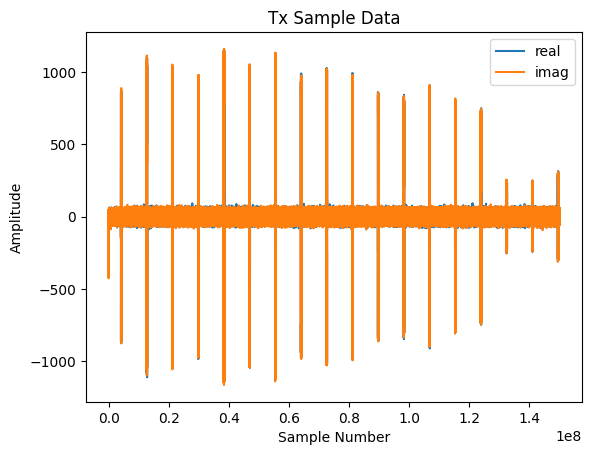

In [8]:
plt.plot(np.real(signal), label='real')
plt.plot(np.imag(signal), label='imag')
plt.title("Tx Sample Data")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.legend()

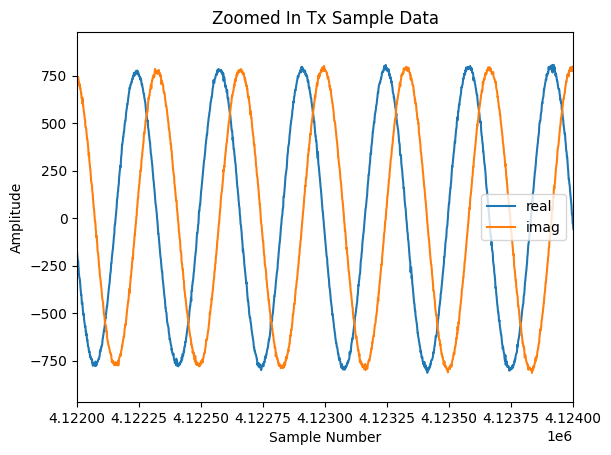

In [24]:
plt.plot(np.real(signal), label='real')
plt.plot(np.imag(signal), label='imag')
plt.xlim(0.4122e7, 0.4124e7)
plt.title("Zoomed In Tx Sample Data")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.legend()